# Notebook for plotting AMS data

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
import pandas as pd

%config InlineBackend.figure_format = 'retina'

In [42]:
# Loading IRM data file
rockmag_data = pd.ExcelFile('../data/Rock_mag_data/SSRM2022C_IRMDB_export.xlsx')
anisotropy_data = pd.read_excel(rockmag_data, 'anisotropy')
anisotropy_data = anisotropy_data.drop(index=0)
AMS_data = anisotropy_data[anisotropy_data['data type'] == 'AMS']
DA4_AMS_data = AMS_data[AMS_data['specimen'].str.contains('DA4')].reset_index(drop=1)
DX1_AMS_data = AMS_data[AMS_data['specimen'].str.contains('DX1')].reset_index(drop=1)

AARM_data = anisotropy_data[anisotropy_data['data type'] == 'AARM']
DA4_AARM_data = AARM_data[AARM_data['specimen'].str.contains('DA4')].reset_index(drop=1)
DX1_AARM_data = AARM_data[AARM_data['specimen'].str.contains('DX1')].reset_index(drop=1)

## plot F vs. L AMS

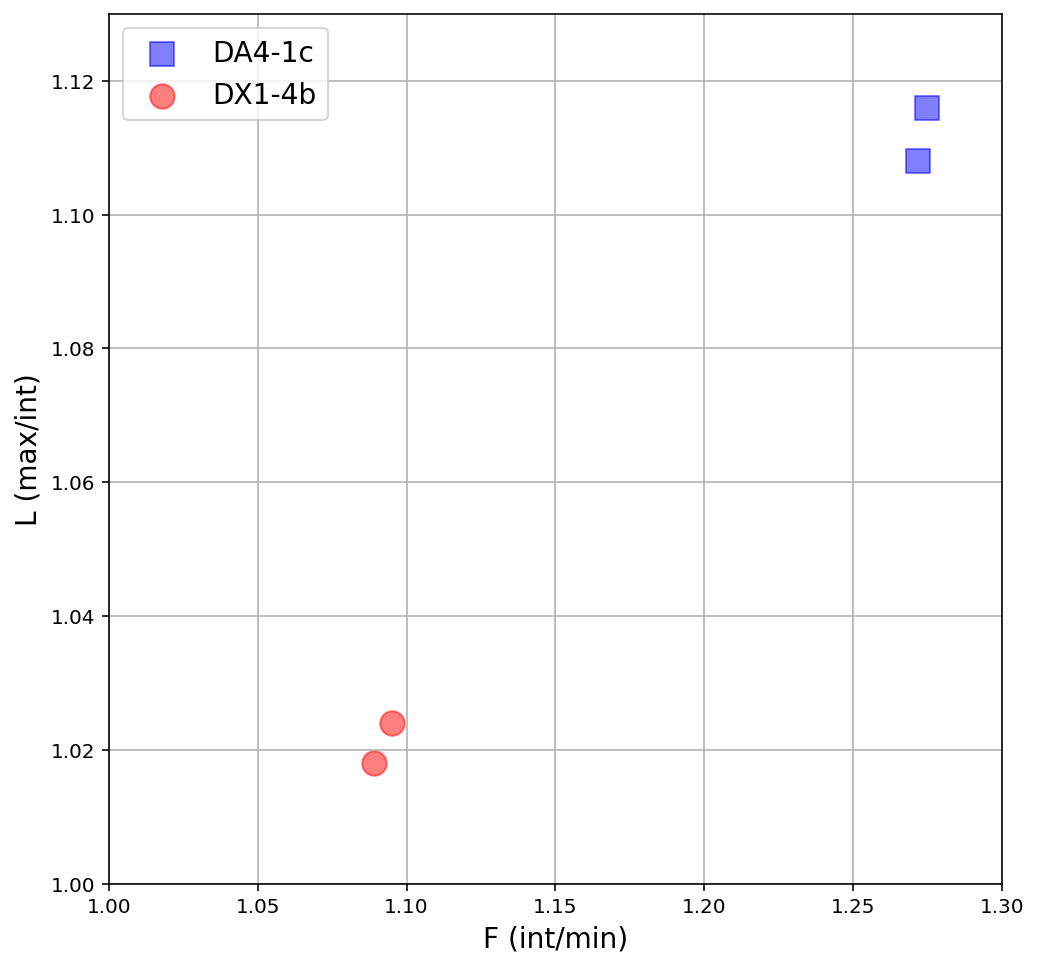

In [3]:
plt.figure(figsize=(8,8))
plt.scatter(DA4_AMS_data['F'], DA4_AMS_data['L'], s=150, marker='s', color='b', alpha=0.5, label='DA4-1c')
plt.scatter(DX1_AMS_data['F'], DX1_AMS_data['L'], s=150, marker='o', color='r', alpha=0.5, label='DX1-4b')

plt.xlabel('F (int/min)',fontsize=14)
plt.ylabel('L (max/int)',fontsize=14)

plt.grid()
plt.xlim(1, 1.3)
plt.ylim(1, 1.13)
plt.legend(fontsize=14)

plt.savefig('code_output/AMS_FL_diagram.pdf', bbox_inches='tight')
plt.show()

## plot Pj vs. Tj AMS

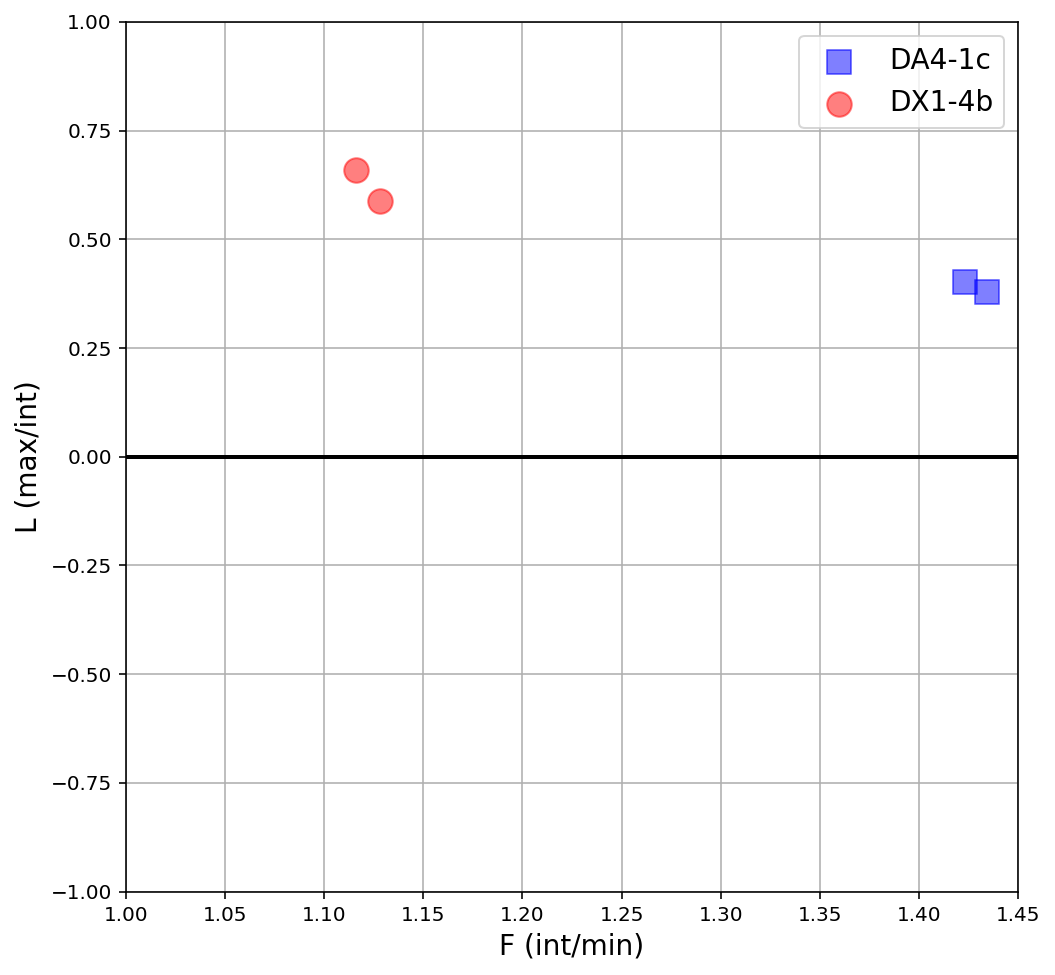

In [5]:
plt.figure(figsize=(8,8))
plt.scatter(DA4_AMS_data['Pj'], DA4_AMS_data['T'], s=150, marker='s', color='b', alpha=0.5, label='DA4-1c')
plt.scatter(DX1_AMS_data['Pj'], DX1_AMS_data['T'], s=150, marker='o', color='r', alpha=0.5, label='DX1-4b')

plt.axhline(0, lw=2, color='k')

plt.xlabel('F (int/min)',fontsize=14)
plt.ylabel('L (max/int)',fontsize=14)

plt.grid()
plt.xlim(1, 1.45)
plt.ylim(-1, 1.)
plt.legend(fontsize=14)
plt.savefig('code_output/AMS_PT_diagram.pdf', bbox_inches='tight')

plt.show()

In [43]:
DA4_AMS_axes = DA4_AMS_data[['specimen','max', 'int', 'min']].groupby(by='specimen').mean().to_numpy()[0]
DA4_AMS_axes = DA4_AMS_axes/np.sqrt(np.sum(DA4_AMS_axes**2))

DA4_AMS_axes

array([0.65827906, 0.59202433, 0.46494717])

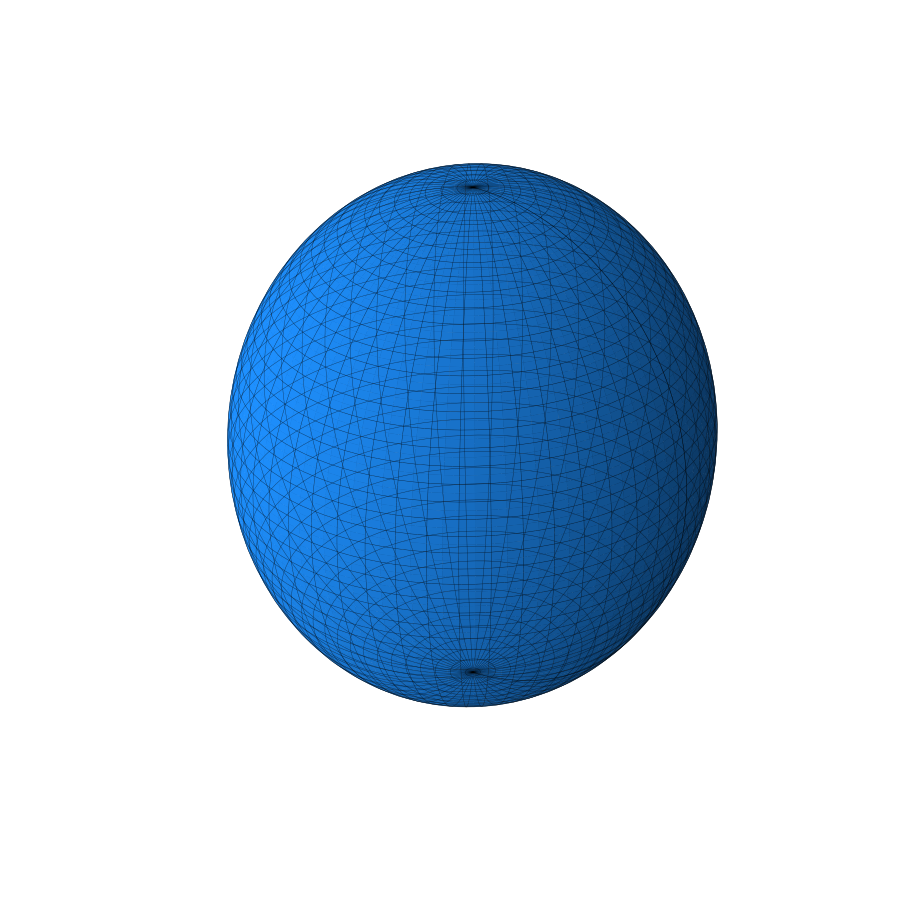

In [45]:
fig = plt.figure(figsize=(8,8))  # Square figure
ax = fig.add_subplot(111, projection='3d')
coefs = DA4_AMS_axes  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:
ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='dodgerblue', shade=1)
ax.plot_wireframe(x, y, z, color='k', alpha=0.6,lw=0.2)

# Adjustment of the axes, so that they all have the same span:
max_radius = min(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
ax.axis('off')
plt.savefig('code_output/DA4_AMS_ellipsoid.png', dpi=300, bbox_inches='tight')

plt.show()

In [24]:
DX1_AMS_axes = DX1_AMS_data[['specimen','max', 'int', 'min']].groupby(by='specimen').mean().to_numpy()[0]
DX1_AMS_axes = DX1_AMS_axes/np.sqrt(np.sum(DX1_AMS_axes**2))
DX1_AMS_axes

array([0.60132097, 0.58914776, 0.53973883])

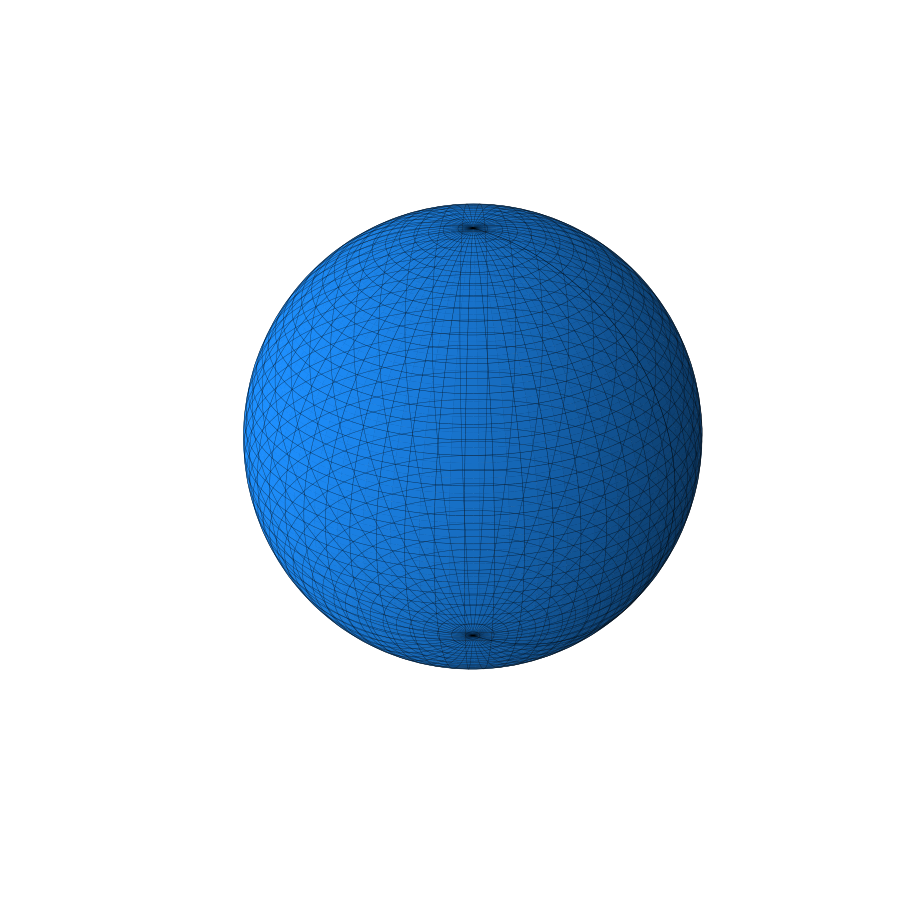

In [38]:
fig = plt.figure(figsize=(8,8))  # Square figure
ax = fig.add_subplot(111, projection='3d')

coefs = DX1_AMS_axes  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:
ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='dodgerblue', linewidth=1, shade=1)
ax.plot_wireframe(x, y, z, color='k', alpha=0.6, lw=0.2)
# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
ax.axis('off')

plt.savefig('code_output/DX1_AMS_ellipsoid.png', dpi=300, bbox_inches='tight')
plt.show()

## plot F vs. L AARM

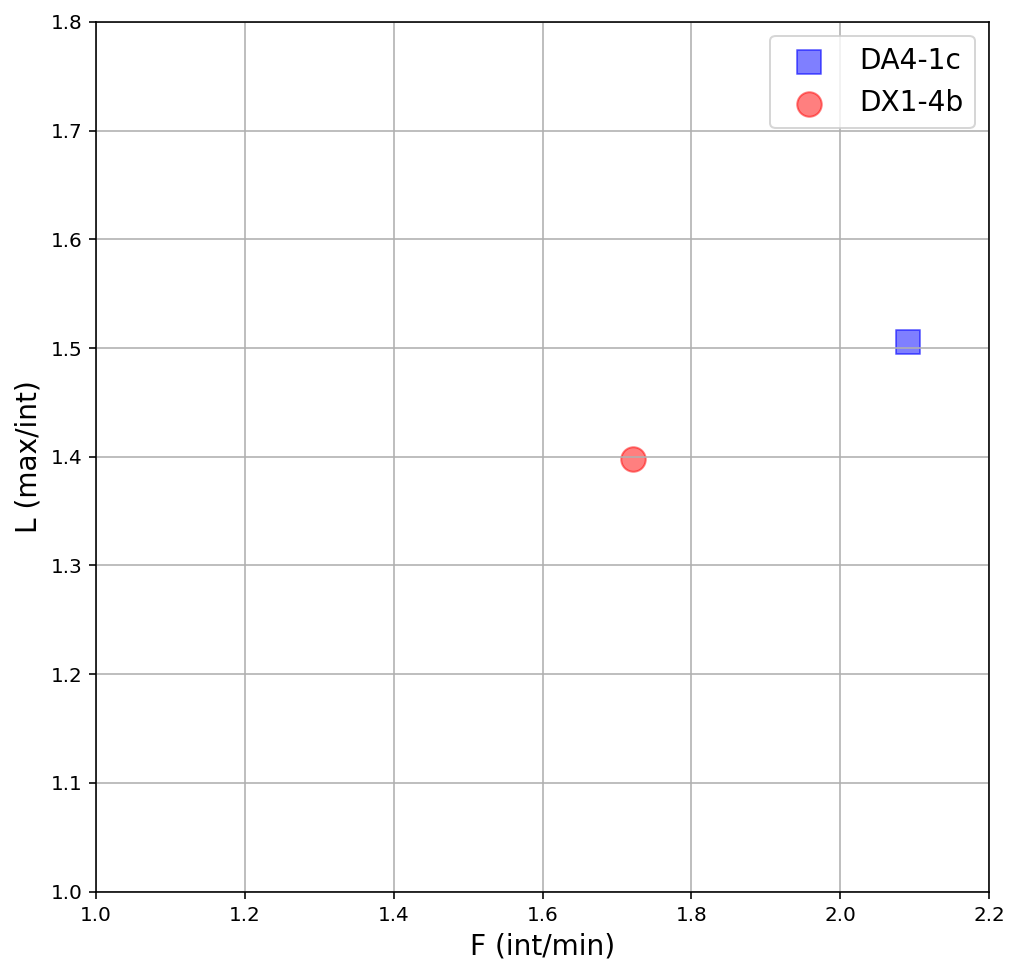

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(DA4_AARM_data['F'], DA4_AARM_data['L'], s=150, marker='s', color='b', alpha=0.5, label='DA4-1c')
plt.scatter(DX1_AARM_data['F'], DX1_AARM_data['L'], s=150, marker='o', color='r', alpha=0.5, label='DX1-4b')

plt.xlabel('F (int/min)',fontsize=14)
plt.ylabel('L (max/int)',fontsize=14)

plt.grid()
plt.xlim(1, 2.2)
plt.ylim(1, 1.8)
plt.legend(fontsize=14)

plt.savefig('code_output/AARM_FL_diagram.pdf', bbox_inches='tight')
plt.show()

## plot Pj vs. Tj AARM

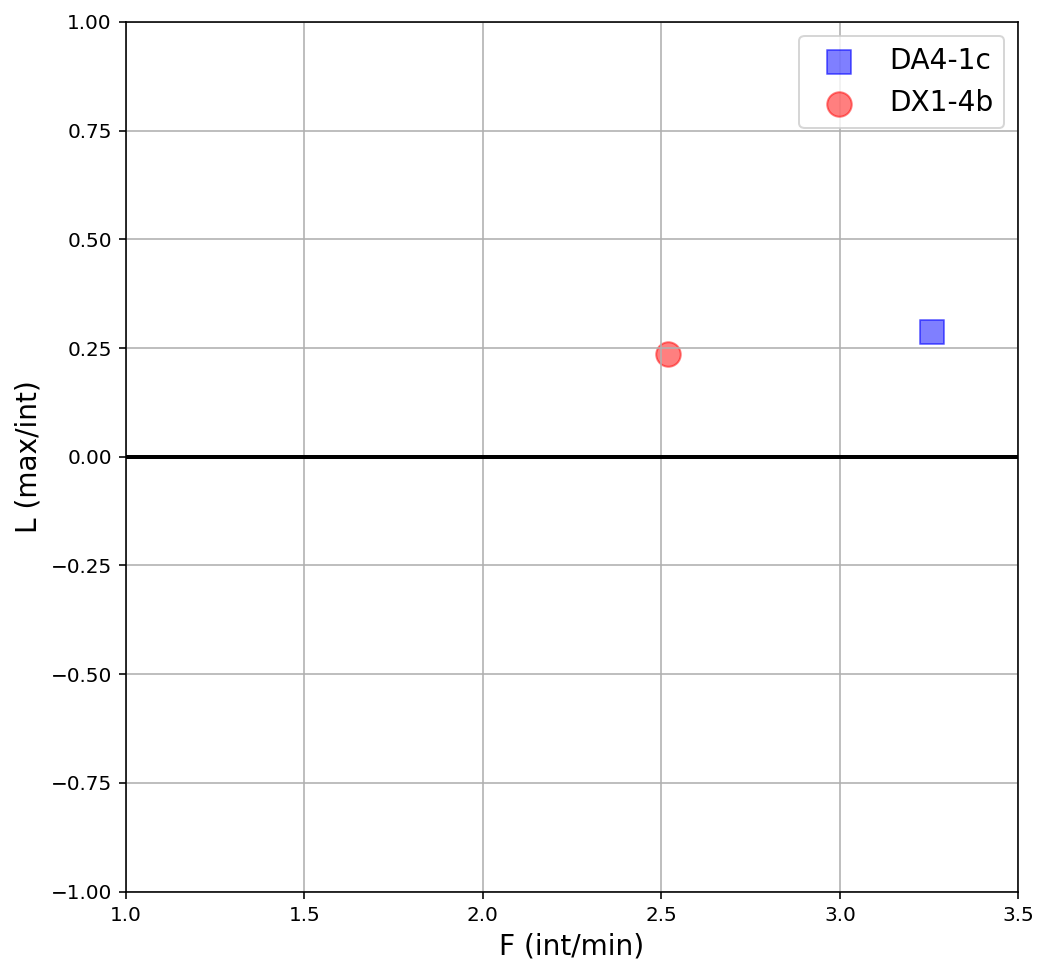

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(DA4_AARM_data['Pj'], DA4_AARM_data['T'], s=150, marker='s', color='b', alpha=0.5, label='DA4-1c')
plt.scatter(DX1_AARM_data['Pj'], DX1_AARM_data['T'], s=150, marker='o', color='r', alpha=0.5, label='DX1-4b')

plt.axhline(0, lw=2, color='k')

plt.xlabel('F (int/min)',fontsize=14)
plt.ylabel('L (max/int)',fontsize=14)

plt.grid()
plt.xlim(1, 3.5)
plt.ylim(-1, 1.)
plt.legend(fontsize=14)
plt.savefig('code_output/AARM_PT_diagram.pdf', bbox_inches='tight')

plt.show()

In [28]:
DA4_AARM_axes = DA4_AARM_data[['specimen','max', 'int', 'min']].groupby(by='specimen').mean().to_numpy()[0]
DA4_AARM_axes = DA4_AARM_axes/np.sqrt(np.sum(DA4_AARM_axes**2))
DA4_AARM_axes

array([0.80534035, 0.53482881, 0.25570502])

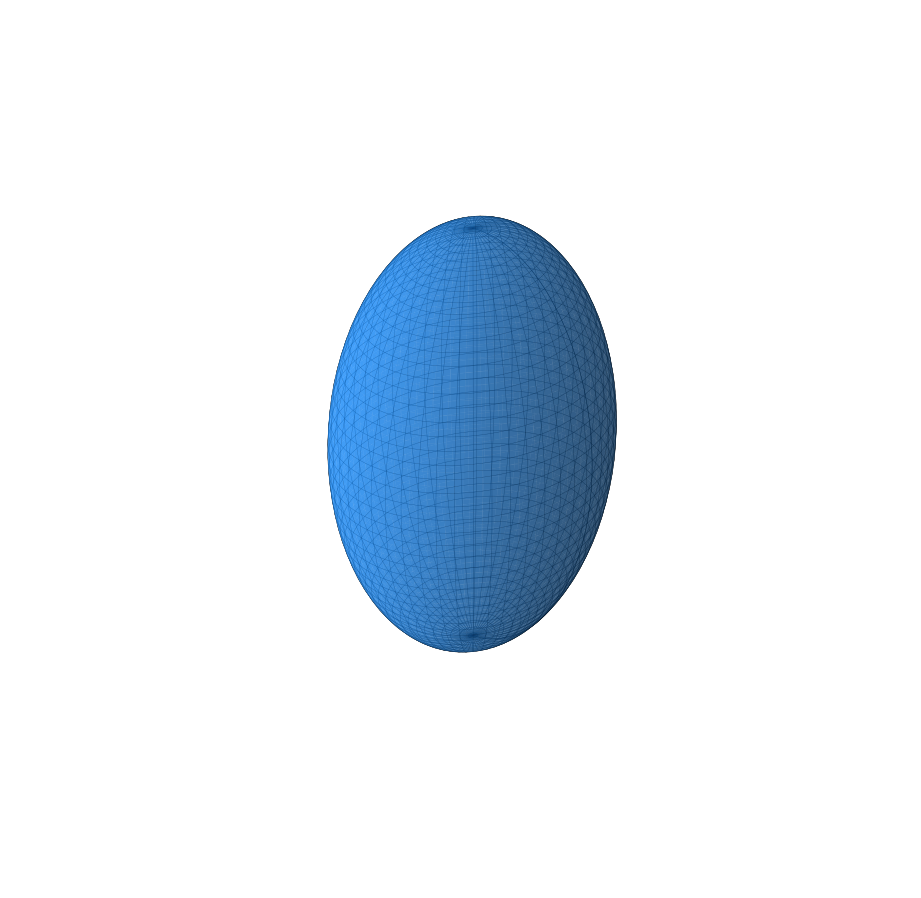

In [40]:
fig = plt.figure(figsize=(8,8))  # Square figure
ax = fig.add_subplot(111, projection='3d')
coefs = DA4_AARM_axes  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:

ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='dodgerblue', alpha=0.6, shade=1, zorder=0)
ax.plot_wireframe(x, y, z, color='k', lw=0.2)

# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
ax.axis('off')
plt.savefig('code_output/DA4_AARM_ellipsoid.png', dpi=300, bbox_inches='tight')

plt.show()

In [33]:
DX1_AARM_axes = DX1_AARM_data[['max', 'int', 'min']].mean().to_numpy()
DX1_AARM_axes = DX1_AARM_axes/np.sqrt(np.sum(DX1_AARM_axes**2))
DX1_AARM_axes

array([0.77039708, 0.55127205, 0.32029279])

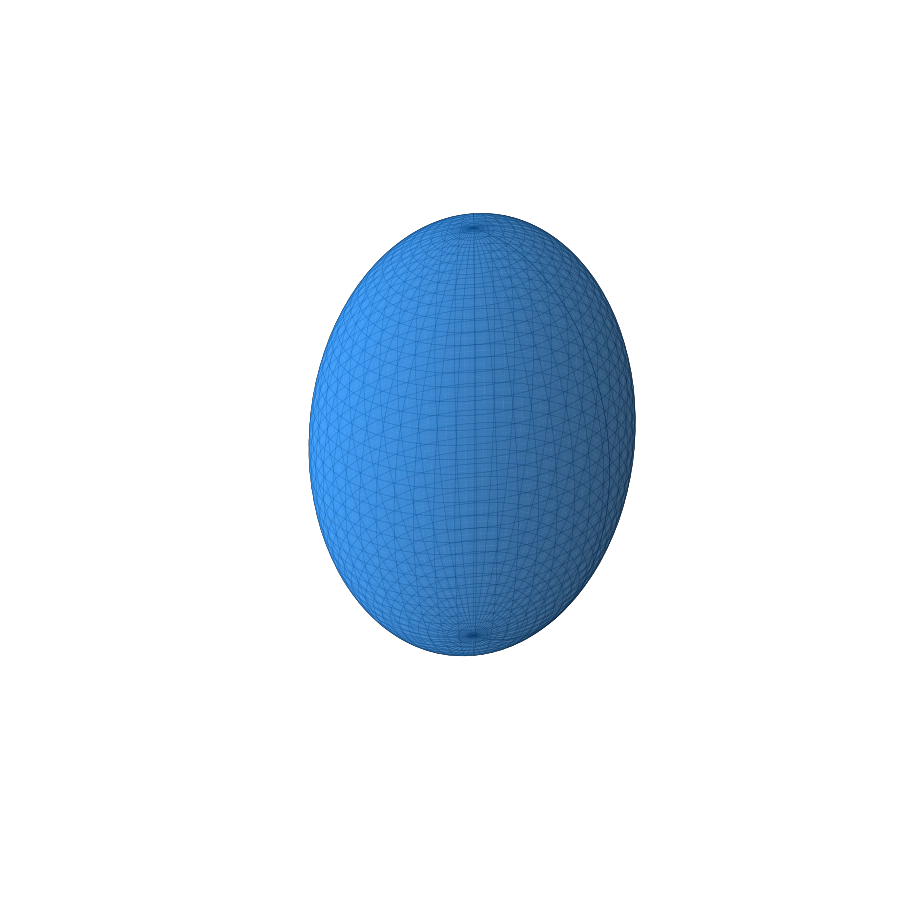

In [41]:
fig = plt.figure(figsize=(8,8))  # Square figure
ax = fig.add_subplot(111, projection='3d')

coefs = DX1_AARM_axes  # Coefficients in a0/c x**2 + a1/c y**2 + a2/c z**2 = 1 
# Radii corresponding to the coefficients:
rx, ry, rz = 1/np.sqrt(coefs)

# Set of all spherical angles:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

# Cartesian coordinates that correspond to the spherical angles:
# (this is the equation of an ellipsoid):
x = rx * np.outer(np.cos(u), np.sin(v))
y = ry * np.outer(np.sin(u), np.sin(v))
z = rz * np.outer(np.ones_like(u), np.cos(v))

# Plot:
ax.plot_surface(x, y, z,  rstride=1, cstride=1, color='dodgerblue', linewidth=1, shade=1, alpha=0.6)
ax.plot_wireframe(x, y, z, color='k', lw=0.2)
# Adjustment of the axes, so that they all have the same span:
max_radius = max(rx, ry, rz)
for axis in 'xyz':
    getattr(ax, 'set_{}lim'.format(axis))((-max_radius, max_radius))
ax.axis('off')

plt.savefig('code_output/DX1_AARM_ellipsoid.png', dpi=300, bbox_inches='tight')
plt.show()